In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score
from scipy.special import softmax

def get_prediction(df):
    return df.apply(softmax, axis=1).apply(lambda x:x[1]).values


def calc_scores(df):
    r = roc_auc_score(df['sign'], df['prediction'])
    a = average_precision_score(df['sign'], df['prediction'])
    print('\t\t roc_auc_score: ', r)
    print('\t\t average_precision_score: ', a)
    return r,a
    

# Evaluation by known or new peptides

In [2]:
df0 = pd.read_parquet('../data/entire_data.parquet')

df1 = pd.read_parquet("../data/recent_data_test_NetTCR2.parquet")
df1['sign'] = df1.binder

df2 = pd.read_parquet("../data/recent_data_test_entire_crossatten.parquet")

df2['prediction'] = get_prediction(df2[['pred0','pred1']])

df3 = pd.read_parquet("../../TCRPrediction/data/recent_data_test_PanPep.parquet")
df3['sign'] = df3.ytrue
df3['binder'] = df3.ytrue

df3['prediction'] = df3.ypred
df3['peptide'] = df3.Peptide

In [3]:
df1 = df1.drop_duplicates(['peptide','CDR3b'])
df2 = df2.drop_duplicates(['peptide','tcrb'])

In [4]:
len(df3), len(df2)

(30221, 30221)

## Total

In [5]:
score_df = []

In [6]:
print("NetTCR2.0, ", len(df1))
# print('\t roc_auc_score: ', roc_auc_score(df1['sign'], df1.prediction))
# print('\t average_precision_score: ', average_precision_score(df1['sign'], df1.prediction))
r,a = calc_scores(df1)

# score_df.append({"NetTCR2.0": {"ROCAUC":r, "APS":a}})
score_df.append((r,a, len(df1), df1.binder.mean()))

print("Ours Cross, ", len(df2))
# print('\t roc_auc_score: ', roc_auc_score(df2['sign'], df2.prediction))
# print('\t average_precision_score: ', average_precision_score(df2['sign'], df2.prediction))

r,a = calc_scores(df2)

# score_df.append({"Ours": {"ROCAUC":r, "APS":a}})
score_df.append((r,a, len(df1), df1.binder.mean()))


print("Ours PanPep, ", len(df2))
r,a = calc_scores(df3)

# score_df.append({"Ours": {"ROCAUC":r, "APS":a}})
score_df.append((r,a, len(df3), df3.binder.mean()))


NetTCR2.0,  30221
		 roc_auc_score:  0.525653879698067
		 average_precision_score:  0.18992668169051194
Ours Cross,  30221
		 roc_auc_score:  0.5438322862701774
		 average_precision_score:  0.19846698443822874
Ours PanPep,  30221
		 roc_auc_score:  0.5336874870031201
		 average_precision_score:  0.18967045761441126


In [7]:
pd.DataFrame(score_df)

,0,1,2,3
0,0.525654,0.189927,30221,0.174481
1,0.543832,0.198467,30221,0.174481
2,0.533687,0.189670,30221,0.174481


## New pep

In [8]:

df1_new_pep = df1[~df1.peptide.isin(df0.peptide)]

df2_new_pep = df2[~df2.peptide.isin(df0.peptide)]

df3_new_pep = df3[~df3.peptide.isin(df0.peptide)]


print('Brand-new pep scores:')
print('\t NetTCR2.0 with brand new pep')
r,a = calc_scores(df1_new_pep)

# score_df.append({"NetTCR2.0 rocauc (New pep)":r, "NetTCR2.0 APS (New pep)":a})
score_df.append((r,a, len(df1_new_pep), df1_new_pep.binder.mean()))



print('\t Ours with brand new pep')
r,a = calc_scores(df2_new_pep)

# score_df.append({"Ours rocauc (New pep)":r, "Ours APS (New pep)":a})
score_df.append((r,a, len(df1_new_pep), df1_new_pep.binder.mean()))


print('\t PanPep with brand new pep')
r,a = calc_scores(df3_new_pep)

# score_df.append({"Ours rocauc (New pep)":r, "Ours APS (New pep)":a})
score_df.append((r,a, len(df3_new_pep), df3_new_pep.ytrue.mean()))


df3_new_pep = df3[~df3.peptide.isin(df0.peptide)]

Brand-new pep scores:
	 NetTCR2.0 with brand new pep
		 roc_auc_score:  0.5096581995856684
		 average_precision_score:  0.17921800600325016
	 Ours with brand new pep
		 roc_auc_score:  0.518130305783687
		 average_precision_score:  0.18320302173588984
	 PanPep with brand new pep
		 roc_auc_score:  0.5358842184672962
		 average_precision_score:  0.19079822061297727


## Known Pep

In [9]:
df1_known_pep = df1[df1.peptide.isin(df0.peptide)]
df2_known_pep = df2[df2.peptide.isin(df0.peptide)]
df3_known_pep = df3[df3.peptide.isin(df0.peptide)]

print('Known pep scores:')

print('\t NetTCR2.0 with known pep')
r, a = calc_scores(df1_known_pep)
# score_df.append({"NetTCR2.0 rocauc (Known pep)":r, "NetTCR2.0 APS (Known pep)":a})
score_df.append((r,a, len(df1_known_pep), df1_known_pep.binder.mean()))


print('\t Ours with known pep')
r,a = calc_scores(df2_known_pep)

# score_df.append({"Ours rocauc (Known pep)":r, "Ours APS (Known pep)":a})
score_df.append((r,a, len(df1_known_pep), df1_known_pep.binder.mean()))


print('\t PanPep with known pep')
r,a = calc_scores(df3_known_pep)
score_df.append((r,a, len(df3_known_pep), df3_known_pep.ytrue.mean()))

Known pep scores:
	 NetTCR2.0 with known pep
		 roc_auc_score:  0.6284454317287734
		 average_precision_score:  0.30590774864880876
	 Ours with known pep
		 roc_auc_score:  0.6559003486009751
		 average_precision_score:  0.3398960223994808
	 PanPep with known pep
		 roc_auc_score:  0.5199369235824169
		 average_precision_score:  0.18520207110505726


In [10]:
_score_df = pd.DataFrame(score_df)
_score_df.columns = ['ROCAUC', 'APS', 'num interactions', 'pos rate']
_score_df.index = ['NetTCR2.0', 'Ours', 'PanPep',
                  'NetTCR2.0 (New peptides)', 'Ours (New peptides)',  'PanPep (New peptides)',
                  'NetTCR2.0 (Known peptides)', 'Ours (Known peptides)',  'PanPep (Known peptides)',
                 ]

In [11]:
_score_df.sort_index(ascending=False)

,ROCAUC,APS,num interactions,pos rate
PanPep (New peptides),0.535884,0.190798,25661,0.173883
PanPep (Known peptides),0.519937,0.185202,4560,0.177851
PanPep,0.533687,0.189670,30221,0.174481
Ours (New peptides),0.518130,0.183203,25661,0.173883
Ours (Known peptides),0.655900,0.339896,4560,0.177851
Ours,0.543832,0.198467,30221,0.174481
NetTCR2.0 (New peptides),0.509658,0.179218,25661,0.173883
NetTCR2.0 (Known peptides),0.628445,0.305908,4560,0.177851
NetTCR2.0,0.525654,0.189927,30221,0.174481


## New TCR

In [12]:
df1_new_tcr = df1[~df1.tcr_combined.isin(df0.tcr_combined)]
df2_new_tcr = df2[~df2.tcr_combined.isin(df0.tcr_combined)]

df3_new_tcr = df3[~df3.CDR3.isin(df0.tcrb)]

print('Brand-new tcr scores:')
print('\t NetTCR2.0 with brand new tcr')
r, a = calc_scores(df1_new_tcr)
score_df.append((r,a, len(df1_new_tcr), df1_new_tcr.binder.mean()))

print('\t Ours with brand new tcr')
r, a  = calc_scores(df2_new_tcr)
score_df.append((r,a, len(df1_new_tcr), df1_new_tcr.binder.mean()))

print('\t PanPep with brand new tcr')
r, a  = calc_scores(df3_new_tcr)
score_df.append((r,a, len(df3_new_tcr), df3_new_tcr.ytrue.mean()))


Brand-new tcr scores:
	 NetTCR2.0 with brand new tcr
		 roc_auc_score:  0.5248037006705324
		 average_precision_score:  0.18880041269743578
	 Ours with brand new tcr
		 roc_auc_score:  0.5430312119125861
		 average_precision_score:  0.19733887110598386
	 PanPep with brand new tcr
		 roc_auc_score:  0.5373796631264116
		 average_precision_score:  0.1923422566755408


## Known TCRs

In [13]:
df1_known_tcr = df1[df1.tcr_combined.isin(df0.tcr_combined)]
df2_known_tcr = df2[df2.tcr_combined.isin(df0.tcr_combined)]
df3_known_tcr = df3[df3.CDR3.isin(df0.tcrb)]


print('Known tcr scores:')
print('\t NetTCR2.0 with brand new tcr')
# r, a = calc_scores(df1_known_tcr)
# score_df.append((r,a))

# print('\t Ours with brand new tcr')
# r, a  = calc_scores(df2_known_tcr)
# score_df.append((r,a))


Known tcr scores:
	 NetTCR2.0 with brand new tcr


In [14]:
len(df3_known_tcr), len(df1_known_tcr)

(1076, 24)

In [15]:
from sklearn.metrics import precision_score, recall_score
print("recall_score", recall_score(df1_known_tcr.binder, df1_known_tcr.prediction>0.5))

print("recall_score", recall_score(df1_known_tcr.binder, df2_known_tcr.prediction>0.5))

r = recall_score(df3_known_tcr.ytrue, df3_known_tcr.prediction>0.5)
print("recall_score (Panpep)", f"{r:.2f}")

recall_score 0.4583333333333333
recall_score 0.5833333333333334
recall_score (Panpep) 0.12


In [16]:

# score_df = pd.DataFrame(score_df)
# score_df.columns = ['ROCAUC', 'APS', '# of interactions', 'Positive rate']
# score_df.index = ['NetTCR2.0', 'Ours', 
#                   'NetTCR2.0 (New peptides)', 'Ours (New peptides)', 
#                   'NetTCR2.0 (Known peptides)', 'Ours (Known peptides)', 
#                   'NetTCR2.0 (New CDR3s)', 'Ours (New CDR3s)', 
#                  ]

In [17]:
_score_df = pd.DataFrame(score_df)
_score_df.columns = ['ROCAUC', 'APS', 'num interactions', 'pos rate']
_score_df.index = ['NetTCR2.0', 'Ours', 'PanPep',
                  'NetTCR2.0 (New peptides)', 'Ours (New peptides)',  'PanPep (New peptides)',
                  'NetTCR2.0 (Known peptides)', 'Ours (Known peptides)',  'PanPep (Known peptides)',
                   'NetTCR2.0 (New CDR3s)', 'Ours (New CDR3s)', 'PanPep (New CDR3s)',
                 ]

In [18]:
_score_df.sort_index(ascending=False)

,ROCAUC,APS,num interactions,pos rate
PanPep (New peptides),0.535884,0.190798,25661,0.173883
PanPep (New CDR3s),0.537380,0.192342,29145,0.175193
PanPep (Known peptides),0.519937,0.185202,4560,0.177851
PanPep,0.533687,0.189670,30221,0.174481
Ours (New peptides),0.518130,0.183203,25661,0.173883
Ours (New CDR3s),0.543031,0.197339,30197,0.173825
Ours (Known peptides),0.655900,0.339896,4560,0.177851
Ours,0.543832,0.198467,30221,0.174481
NetTCR2.0 (New peptides),0.509658,0.179218,25661,0.173883
NetTCR2.0 (New CDR3s),0.524804,0.188800,30197,0.173825


In [19]:
import pandas as pd
pd.set_option('display.precision', 4)


In [20]:
print(_score_df.sort_index(ascending=True).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  ROCAUC &     APS &  num interactions &  pos rate \\
\midrule
NetTCR2.0                  &  0.5257 &  0.1899 &             30221 &    0.1745 \\
NetTCR2.0 (Known peptides) &  0.6284 &  0.3059 &              4560 &    0.1779 \\
NetTCR2.0 (New CDR3s)      &  0.5248 &  0.1888 &             30197 &    0.1738 \\
NetTCR2.0 (New peptides)   &  0.5097 &  0.1792 &             25661 &    0.1739 \\
Ours                       &  0.5438 &  0.1985 &             30221 &    0.1745 \\
Ours (Known peptides)      &  0.6559 &  0.3399 &              4560 &    0.1779 \\
Ours (New CDR3s)           &  0.5430 &  0.1973 &             30197 &    0.1738 \\
Ours (New peptides)        &  0.5181 &  0.1832 &             25661 &    0.1739 \\
PanPep                     &  0.5337 &  0.1897 &             30221 &    0.1745 \\
PanPep (Known peptides)    &  0.5199 &  0.1852 &              4560 &    0.1779 \\
PanPep (New CDR3s)         &  0.5374 &  0.1923 &             29145 &    0.1752 \\

/var/folders/0t/4gd_k20d0_l07n5xyz8pvych0000gn/T/ipykernel_14810/3925054261.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(_score_df.sort_index(ascending=True).to_latex())


In [21]:
# df1_known_tcr = df1[df1.tcr_combined.isin(df0.tcr_combined)]
# df2_known_tcr = df2[df2.tcr_combined.isin(df0.tcr_combined)]

# print('Brand-known tcr scores:')
# print('\t NetTCR2.0 with brand known tcr')
# calc_scores(df1_known_tcr)

# print('\t Ours with brand known tcr')
# calc_scores(df2_known_tcr)

In [22]:
!ls temp_*

temp_aligned.txt     temp_distmat.txt
temp_distmat.parquet temp_fasta.txt


# TCR Distribution

In [23]:
import umap
reducer = umap.UMAP(metric='precomputed', random_state=42)

df_distmat = pd.read_parquet("temp_distmat.parquet")

embedding = reducer.fit_transform(df_distmat)
print('embedding.shape', embedding.shape)

df_emb = pd.DataFrame(embedding, columns=['umap0','umap1'])


/Users/kyoheikoyama/.pyenv/versions/miniconda3-latest/envs/electric/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


embedding.shape (18033, 2)


In [24]:
%%time
from analysis_util import make_distance_mat
nn = 10000
distmat = make_distance_mat(df0.sample(nn, random_state=nn), 
                  df1.sample(nn, random_state=nn),  'temp')

CPU times: user 6.7 s, sys: 12.1 s, total: 18.8 s
Wall time: 7.39 s


In [25]:
df_emb['tcr_combined'] = distmat.index

df_emb['is_in_entire'] = df_emb['tcr_combined'].isin(df0.tcr_combined)
df_emb['is_in_recenttest'] = df_emb['tcr_combined'].isin(df1.tcr_combined)

df_emb['is_in_both'] = (df_emb['is_in_entire']) & (df_emb['is_in_recenttest'])

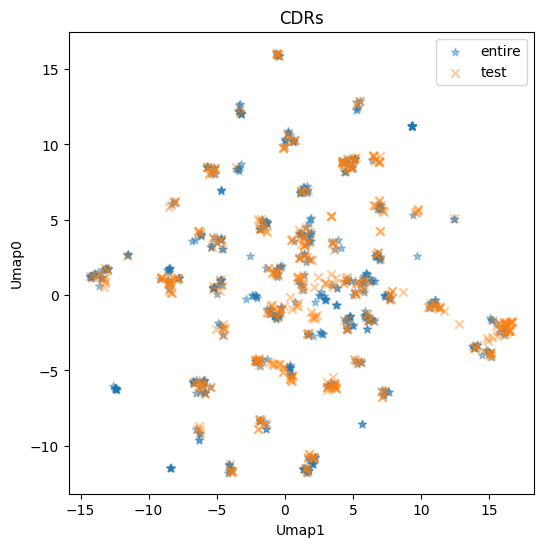

In [26]:
from matplotlib import pyplot as plt


nni=500
sampled_emb = pd.concat([df_emb.query('is_in_entire!=True').sample(nni),
                         df_emb.query('is_in_recenttest!=True').sample(nni),
                        ])


plt.figure(figsize=(6,6))

plt.scatter(sampled_emb.query('is_in_entire==True').umap0, 
            sampled_emb.query('is_in_entire==True').umap1, alpha=0.4,
            marker='*'
           )

plt.scatter(sampled_emb.query('is_in_recenttest==True').umap0, 
            sampled_emb.query('is_in_recenttest==True').umap1, alpha=0.4, 
            marker='x'
           )

plt.title('CDRs')
plt.legend(['entire', 'test'])
plt.xlabel('Umap1')
plt.ylabel('Umap0')
plt.show()

# Peptide Distribution

In [27]:
%%time
import os

peptide_all_unique = list(set(df0.peptide.dropna().unique().tolist()+df1.peptide.dropna().unique().tolist()))

ofile = open("peptide_all_fasta.txt", "w")
for i, seq in enumerate(peptide_all_unique):
    ofile.write(">" + str(i) + "\n" + seq + "\n")
ofile.close()

if not os.path.exists('peptide_all_entire.txt'):
    os.system("~/Downloads/clustalo -i peptide_all_fasta.txt -o peptide_all_entire.txt --full --distmat-out=peptide_all_entire_distmat.txt")



CPU times: user 30.2 ms, sys: 21.8 ms, total: 52 ms
Wall time: 115 ms


In [28]:
df_distmat = pd.read_csv('peptide_all_entire_distmat.txt',sep=' ', skiprows=[0], header=None, skipinitialspace=True)


In [29]:
df_distmat = df_distmat.iloc[:,1:]
df_distmat.columns = peptide_all_unique
df_distmat.index = peptide_all_unique
df_distmat.to_parquet('peptide_all_entire_distmat.parquet')


In [30]:
reducer = umap.UMAP(metric='precomputed', random_state=42)

df_distmat = pd.read_parquet("peptide_all_entire_distmat.parquet")

embedding = reducer.fit_transform(df_distmat)
print('embedding.shape', embedding.shape)

df_emb = pd.DataFrame(embedding, columns=['umap0','umap1'])


/Users/kyoheikoyama/.pyenv/versions/miniconda3-latest/envs/electric/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")

KeyboardInterrupt



In [ ]:
df_emb['peptide'] = peptide_all_unique

df_emb['is_in_entire'] = df_emb['peptide'].isin(df0.peptide)
df_emb['is_in_recenttest'] = df_emb['peptide'].isin(df1.peptide)

df_emb['is_in_both'] = (df_emb['is_in_entire']) & (df_emb['is_in_recenttest'])

In [ ]:
from matplotlib import pyplot as plt


nni=100

sampled_emb = pd.concat([df_emb.query('is_in_entire==True').sample(nni),
                         df_emb.query('is_in_recenttest==True').sample(nni),
                        ])


plt.figure(figsize=(6,6))

plt.scatter(sampled_emb.query('is_in_entire==True').umap0, 
            sampled_emb.query('is_in_entire==True').umap1, alpha=0.4,
            marker='*'
           )

plt.scatter(sampled_emb.query('is_in_recenttest==True').umap0, 
            sampled_emb.query('is_in_recenttest==True').umap1, alpha=0.4, 
            marker='x'
           )

plt.title('Peptide')
plt.legend(['entire', 'test'])
plt.xlabel('Umap1')
plt.ylabel('Umap0')
plt.show()